### **f-Divergence**

$$
D_f(P \| Q) = \int q(x) \, f\Big(\frac{p(x)}{q(x)}\Big) \, dx
$$

**Definition:**
- $P$ and $Q$ are probability distributions.
- $f:\mathbb{R}_+ \to \mathbb{R}$ is a convex function with $f(1) = 0$.
- Measures how different $P$ is from $Q$.

**Special cases:**
- KL Divergence: $f(t) = t \log t$
- Total Variation: $f(t) = \frac{1}{2} |t-1|$
- Pearson $\chi^2$: $f(t) = (t-1)^2$


## f-Divergence for 1D Array (length 10)

🔹 Step 1: Generate random probability distributions P and Q of length 10
P distribution: [0.08499533 0.11822888 0.10718063 0.09757072 0.07837515 0.10189255
 0.0130107  0.13480955 0.1215615  0.14237502]
Q distribution: [0.2017532  0.21844526 0.05037681 0.07281722 0.03070097 0.05618169
 0.08808275 0.02927057 0.11917793 0.13319355]

🔹 Step 2: Compute element-wise ratio r = p/q
Ratio p/q: [0.42128366 0.5412289  2.127579   1.3399402  2.552856   1.8136256
 0.14770995 4.605634   1.0200001  1.0689332 ]

🔹 Step 3: Compute f(r) = r * log(r)
f(p/q): [-0.3641782  -0.33226746  1.6062895   0.39209998  2.392569    1.0797019
 -0.28249598  7.0340943   0.02019878  0.07125637]

🔹 Step 4: Compute f-divergence = sum(q * f(p/q))
f-divergence: 0.29043576


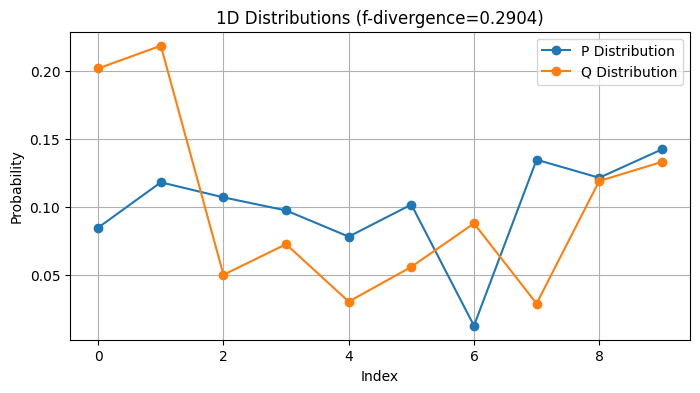

In [6]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

key = jax.random.PRNGKey(42)

print("🔹 Step 1: Generate random probability distributions P and Q of length 10")

p = jax.random.uniform(key, shape=(10,))
key, subkey = jax.random.split(key)
q = jax.random.uniform(subkey, shape=(10,))

# Normalize to get valid probability distributions
p = p / jnp.sum(p)
q = q / jnp.sum(q)

print("P distribution:", p)
print("Q distribution:", q)

print("\n🔹 Step 2: Compute element-wise ratio r = p/q")
ratio = p / q
print("Ratio p/q:", ratio)

print("\n🔹 Step 3: Compute f(r) = r * log(r)")
f_ratio = ratio * jnp.log(ratio)
print("f(p/q):", f_ratio)

print("\n🔹 Step 4: Compute f-divergence = sum(q * f(p/q))")
f_div = jnp.sum(q * f_ratio)
print("f-divergence:", f_div)

# ---- Visualization ----
plt.figure(figsize=(8,4))
plt.plot(range(10), p, marker='o', label='P Distribution')
plt.plot(range(10), q, marker='o', label='Q Distribution')
plt.title(f"1D Distributions (f-divergence={f_div:.4f})")
plt.xlabel("Index")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


## f-Divergence for 2×2 Matrix

🔹 Step 1: Generate two random 2x2 probability matrices
P matrix:
 [[0.21700995 0.12824386]
 [0.36895245 0.28579366]]
Q matrix:
 [[0.37543753 0.07795076]
 [0.4345411  0.11207061]]

🔹 Step 2: Compute element-wise ratio p/q
Ratio p/q:
 [[0.5780188  1.6451907 ]
 [0.84906226 2.5501213 ]]

🔹 Step 3: Compute f(r) = r * log(r)
f(p/q):
 [[-0.31684038  0.8190686 ]
 [-0.13892591  2.3872728 ]]

🔹 Step 4: Compute f-divergence = sum(q * f(p/q))
f-divergence: 0.15206736


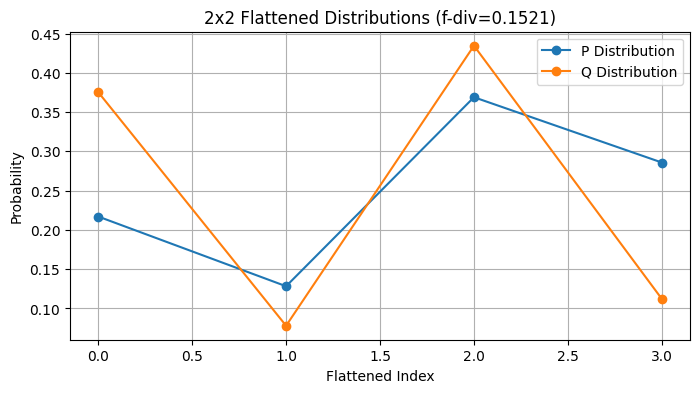

In [7]:
print("🔹 Step 1: Generate two random 2x2 probability matrices")

p = jax.random.uniform(key, shape=(2,2))
key, subkey = jax.random.split(key)
q = jax.random.uniform(subkey, shape=(2,2))

# Normalize
p = p / jnp.sum(p)
q = q / jnp.sum(q)

print("P matrix:\n", p)
print("Q matrix:\n", q)

print("\n🔹 Step 2: Compute element-wise ratio p/q")
ratio = p / q
print("Ratio p/q:\n", ratio)

print("\n🔹 Step 3: Compute f(r) = r * log(r)")
f_ratio = ratio * jnp.log(ratio)
print("f(p/q):\n", f_ratio)

print("\n🔹 Step 4: Compute f-divergence = sum(q * f(p/q))")
f_div = jnp.sum(q * f_ratio)
print("f-divergence:", f_div)

# Flatten for line plot
p_flat = p.flatten()
q_flat = q.flatten()

plt.figure(figsize=(8,4))
plt.plot(range(len(p_flat)), p_flat, marker='o', label='P Distribution')
plt.plot(range(len(q_flat)), q_flat, marker='o', label='Q Distribution')
plt.title(f"2x2 Flattened Distributions (f-div={f_div:.4f})")
plt.xlabel("Flattened Index")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


## f-Divergence for 3×3 Matrix

🔹 Step 1: Generate two random 3x3 probability matrices
P matrix:
 [[0.05525852 0.22018833 0.0459436 ]
 [0.14215988 0.13433135 0.19569115]
 [0.08580445 0.02422791 0.09639477]]
Q matrix:
 [[0.07443561 0.07198798 0.03047953]
 [0.01301762 0.21340683 0.16529006]
 [0.05180654 0.17006911 0.20950675]]

🔹 Step 2: Compute element-wise ratio p/q
Ratio p/q:
 [[ 0.7423666   3.058682    1.5073595 ]
 [10.920569    0.62946135  1.1839257 ]
 [ 1.6562475   0.14245921  0.46010342]]

🔹 Step 3: Compute f(r) = r * log(r)
f(p/q):
 [[-0.22115996  3.4195576   0.6185592 ]
 [26.107239   -0.29137188  0.19988908]
 [ 0.83566713 -0.2776102  -0.35718012]]

🔹 Step 4: Compute f-divergence = sum(q * f(p/q))
f-divergence: 0.48051992


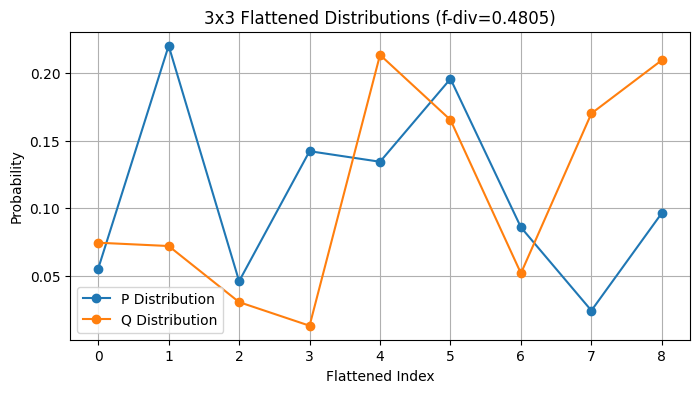

In [8]:
print("🔹 Step 1: Generate two random 3x3 probability matrices")

p = jax.random.uniform(key, shape=(3,3))
key, subkey = jax.random.split(key)
q = jax.random.uniform(subkey, shape=(3,3))

p = p / jnp.sum(p)
q = q / jnp.sum(q)

print("P matrix:\n", p)
print("Q matrix:\n", q)

print("\n🔹 Step 2: Compute element-wise ratio p/q")
ratio = p / q
print("Ratio p/q:\n", ratio)

print("\n🔹 Step 3: Compute f(r) = r * log(r)")
f_ratio = ratio * jnp.log(ratio)
print("f(p/q):\n", f_ratio)

print("\n🔹 Step 4: Compute f-divergence = sum(q * f(p/q))")
f_div = jnp.sum(q * f_ratio)
print("f-divergence:", f_div)

# Flatten for line plot
p_flat = p.flatten()
q_flat = q.flatten()

plt.figure(figsize=(8,4))
plt.plot(range(len(p_flat)), p_flat, marker='o', label='P Distribution')
plt.plot(range(len(q_flat)), q_flat, marker='o', label='Q Distribution')
plt.title(f"3x3 Flattened Distributions (f-div={f_div:.4f})")
plt.xlabel("Flattened Index")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


## f-Divergence for 5×5 Matrix

🔹 Step 1: Generate two random 5x5 probability matrices
P matrix:
 [[0.07168173 0.04008173 0.03084177 0.07022288 0.06230605]
 [0.03150584 0.04121399 0.06950096 0.01661674 0.0093413 ]
 [0.03787601 0.02294505 0.0593463  0.0063071  0.0219859 ]
 [0.03485057 0.06010585 0.06159911 0.01266503 0.05291777]
 [0.05765782 0.04609555 0.05038715 0.01999164 0.01195615]]
Q matrix:
 [[0.06755262 0.02752031 0.03498186 0.0882039  0.06574662]
 [0.00245028 0.00023263 0.00343468 0.01019235 0.0017516 ]
 [0.08753619 0.08165354 0.0889458  0.0238285  0.03088562]
 [0.04543714 0.02110899 0.01919593 0.06449594 0.07026903]
 [0.06230562 0.04415806 0.01800996 0.00538054 0.03472229]]

🔹 Step 2: Compute element-wise ratio p/q
Ratio p/q:
 [[  1.0611243    1.4564419    0.8816503    0.79614264   0.94766927]
 [ 12.858069   177.1628      20.23504      1.6303141    5.332997  ]
 [  0.43268976   0.28100494   0.66721874   0.26468712   0.71184915]
 [  0.7670062    2.8474052    3.2089674    0.19636942   0.753074  ]
 [  0.9254033  

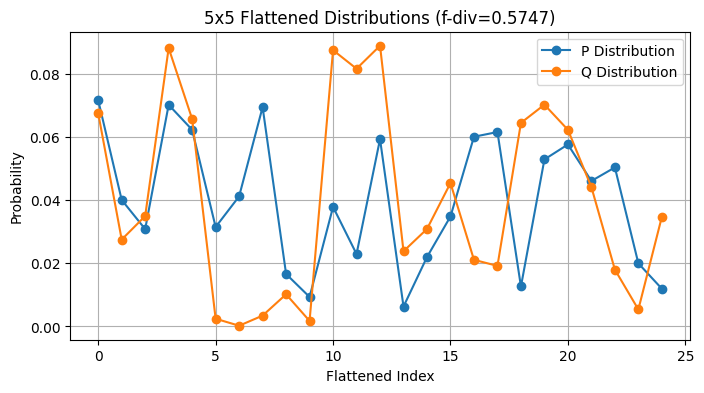

In [9]:
print("🔹 Step 1: Generate two random 5x5 probability matrices")

p = jax.random.uniform(key, shape=(5,5))
key, subkey = jax.random.split(key)
q = jax.random.uniform(subkey, shape=(5,5))

p = p / jnp.sum(p)
q = q / jnp.sum(q)

print("P matrix:\n", p)
print("Q matrix:\n", q)

print("\n🔹 Step 2: Compute element-wise ratio p/q")
ratio = p / q
print("Ratio p/q:\n", ratio)

print("\n🔹 Step 3: Compute f(r) = r * log(r)")
f_ratio = ratio * jnp.log(ratio)
print("f(p/q):\n", f_ratio)

print("\n🔹 Step 4: Compute f-divergence = sum(q * f(p/q))")
f_div = jnp.sum(q * f_ratio)
print("f-divergence:", f_div)

# Flatten for line plot
p_flat = p.flatten()
q_flat = q.flatten()

plt.figure(figsize=(8,4))
plt.plot(range(len(p_flat)), p_flat, marker='o', label='P Distribution')
plt.plot(range(len(q_flat)), q_flat, marker='o', label='Q Distribution')
plt.title(f"5x5 Flattened Distributions (f-div={f_div:.4f})")
plt.xlabel("Flattened Index")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


## 3D Matrix (Shape 2×2×2) Example

🔹 Step 1: Generate two random 3D probability matrices (2x2x2)
P 3D tensor:
 [[[0.11547283 0.16062321]
  [0.1456133  0.1325575 ]]

 [[0.1064788  0.13842902]
  [0.01767605 0.18314935]]]
Q 3D tensor:
 [[[0.26985756 0.29218423]
  [0.06738213 0.0973976 ]]

 [[0.04106447 0.07514653]
  [0.11781619 0.03915123]]]

🔹 Step 2: Compute element-wise ratio p/q
Ratio p/q:
 [[[0.4279029  0.5497326 ]
  [2.1610074  1.3609934 ]]

 [[2.5929663  1.8421212 ]
  [0.15003076 4.6779976 ]]]

🔹 Step 3: Compute f(r) = r * log(r)
f(p/q):
 [[[-0.36322922 -0.3289178 ]
  [ 1.6652173   0.41947836]]

 [[ 2.4705849   1.1253846 ]
  [-0.2845956   7.217543  ]]]

🔹 Step 4: Compute f-divergence = sum(q * f(p/q))
f-divergence: 0.39400506


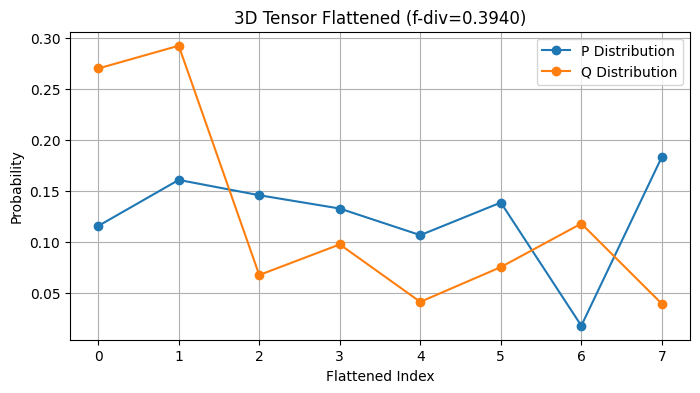

In [10]:
print("🔹 Step 1: Generate two random 3D probability matrices (2x2x2)")

key = jax.random.PRNGKey(42)

p = jax.random.uniform(key, shape=(2,2,2))
key, subkey = jax.random.split(key)
q = jax.random.uniform(subkey, shape=(2,2,2))

# Normalize to create probability distributions
p = p / jnp.sum(p)
q = q / jnp.sum(q)

print("P 3D tensor:\n", p)
print("Q 3D tensor:\n", q)

print("\n🔹 Step 2: Compute element-wise ratio p/q")
ratio = p / q
print("Ratio p/q:\n", ratio)

print("\n🔹 Step 3: Compute f(r) = r * log(r)")
f_ratio = ratio * jnp.log(ratio)
print("f(p/q):\n", f_ratio)

print("\n🔹 Step 4: Compute f-divergence = sum(q * f(p/q))")
f_div = jnp.sum(q * f_ratio)
print("f-divergence:", f_div)

# ---- Visualization ----
p_flat = p.flatten()
q_flat = q.flatten()

plt.figure(figsize=(8,4))
plt.plot(range(len(p_flat)), p_flat, marker='o', label='P Distribution')
plt.plot(range(len(q_flat)), q_flat, marker='o', label='Q Distribution')
plt.title(f"3D Tensor Flattened (f-div={f_div:.4f})")
plt.xlabel("Flattened Index")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()
